# 结果展示

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

%matplotlib inline
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline

/Users/liuan/miniconda3/envs/rl-stock/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## 数据读取

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
print("root_path: ", root_path)

root_path:  /Users/liuan/NUS/ME5406 Deep Learning for robotics /project2/StockRL/learn/trade_file


In [3]:
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "account_value_{}.csv".format(model))

In [4]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
# ddpg_account_value = pd.read_csv(path_dict["ddpg"])
# ppo_account_value = pd.read_csv(path_dict["ppo"])
# sac_account_value = pd.read_csv(path_dict["sac"])
# td3_account_value = pd.read_csv(path_dict["td3"])

## 获取 baseline 的结果

In [5]:
baseline_df = get_baseline(config.SSE_50_INDEX, 
              start="20190101",
              end="20210101")
baseline_stats = backtest_stats(baseline_df, value_col_name='close')

   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (487, 8)
Annual return          0.271107
Cumulative returns     0.589776
Annual volatility      0.189096
Sharpe ratio           1.366667
Calmar ratio           1.487275
Stability              0.618053
Max drawdown          -0.182284
Omega ratio            1.286287
Sortino ratio          1.953108
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.078570
Daily value at risk   -0.022798
dtype: float64


In [6]:
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6

In [7]:
baseline_df.head()

,tic,date,open,high,low,close,volume,day,processed_close
0,000016.SH,2019-01-02,2262.7908,2298.1805,2301.0552,2252.7479,20880697.0,2,1.000000e+06
1,000016.SH,2019-01-03,2269.2430,2259.4825,2287.7778,2253.9433,18895240.0,3,1.000531e+06
2,000016.SH,2019-01-04,2314.6466,2252.7449,2316.3528,2249.3658,25900596.0,4,9.984987e+05
3,000016.SH,2019-01-07,2314.3193,2329.0316,2331.6031,2306.8979,25278948.0,0,1.024037e+06
4,000016.SH,2019-01-08,2305.1708,2312.1705,2312.1705,2298.9548,18131160.0,1,1.020511e+06


## 展示最终的结果

In [8]:
result_account_value = pd.DataFrame(data = {
                                        'a2c': a2c_account_value['total_assets'], 
                                        # 'ddpg': ddpg_account_value['total_assets'],
                                        # 'ppo': ppo_account_value['total_assets'],
                                        # 'sac': sac_account_value['total_assets'],
                                        # 'td3': td3_account_value['total_assets'],
                                        'baseline': baseline_df['processed_close']
                                        })

In [9]:
result_account_value = result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)

In [10]:
result_account_value.head()

,a2c,baseline
0,0.000000,0.000000
1,0.000437,0.000531
2,0.001931,-0.001501
3,0.001515,0.024037
4,0.002353,0.020511


<Axes: >

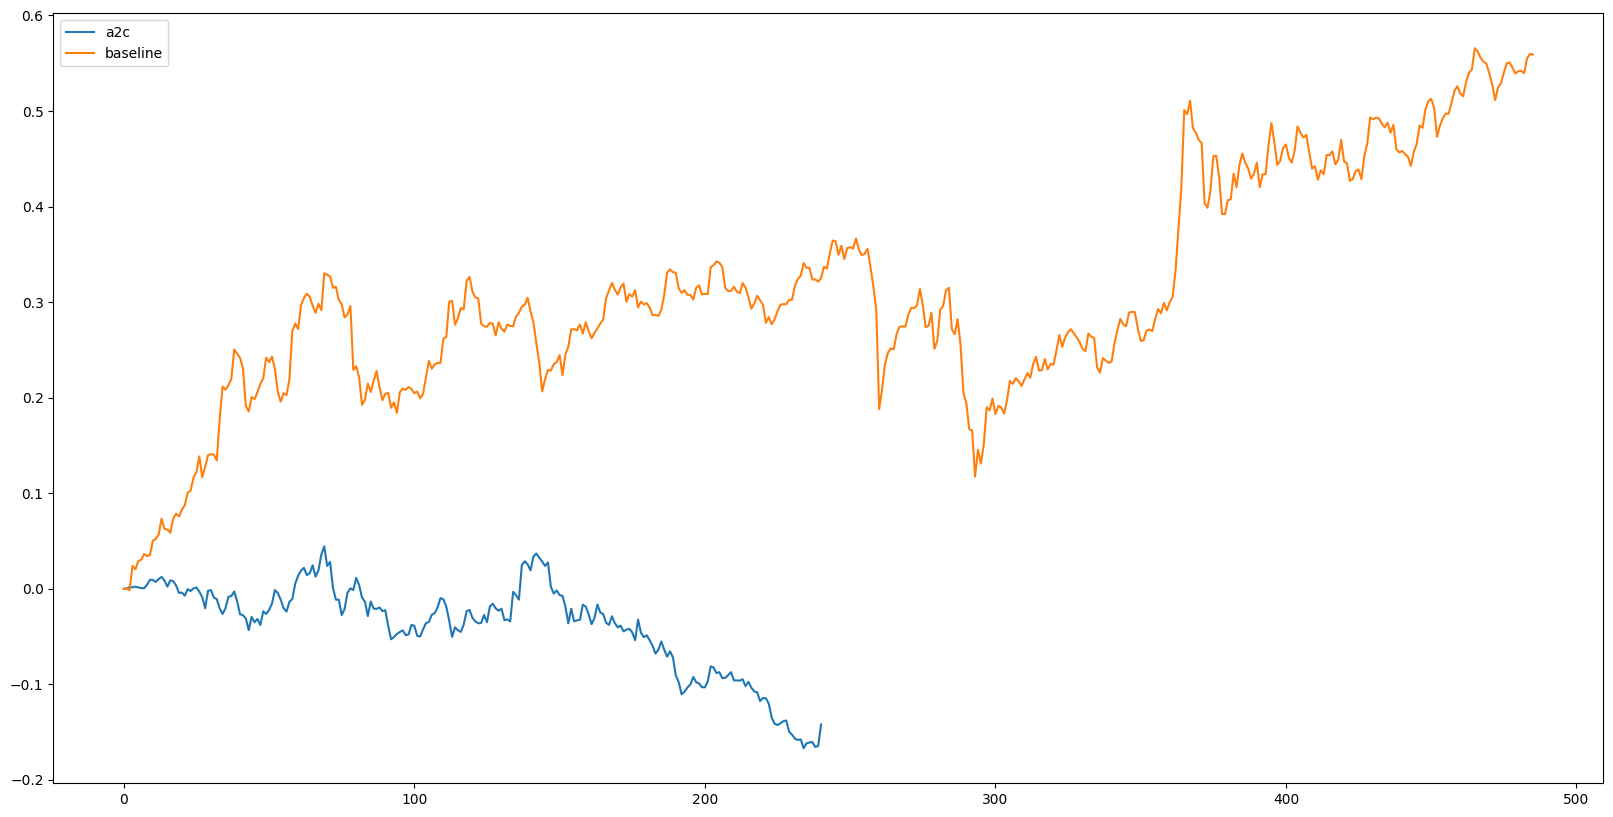

In [11]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
result_account_value.plot(figsize = (20, 10))

## 展示 A2C 的回测结果

In [14]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(a2c_account_value,
        baseline_start="20230101",
        baseline_end="20240101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (242, 8)


AttributeError: 'Series' object has no attribute 'iteritems'

## 展示 DDPG 的回测结果

In [ ]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ddpg_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 PPO 的回测结果

In [ ]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ppo_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

In [ ]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(sac_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

In [ ]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(td3_account_value,
        baseline_start="20190101",
        baseline_end="20210101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )